# Aproximación de la derivada

Suponga que queremos calcular $f'(t)$, la derivada una función conocida, definida como: 
\begin{equation}
f'(t)= \lim_{h\to 0} \frac{f(t+h)-f(t)}{h}
\end{equation}
Expandiendo el límite usando espanciones de Taylor a primer orden de $f(t+h)$ (para un $h$ dado pequeño), la derivada se puede escribir como:
\begin{equation}
f'(t)= \frac{f(t+h)-f(t)}{h} +\mathcal{O}(h).
\end{equation}
El primer término es la aproximación de la derivada (llamada \textit{forward derivative}) y el segundo término es el error linear asociado en $h$ (usualmente, mientras más grande sea $h$ más grande es el error. 

# Números de punto flotante en Python

El número de bits suele ser fijo para cualquier computadora. El uso de la representación binaria nos da un rango y una precisión de números insuficientes para hacer cálculos de ingeniería relevantes. Para lograr el rango de valores necesarios con el mismo número de bits, usamos números de punto flotante. En lugar de utilizar cada bit como el coeficiente de una potencia de 2, los flotantes asignan bits a tres partes diferentes: 
*  el indicador de signo, $s$, que nos dice si un número es positivo o negativo.
*  el exponente, $e$, que es la potencia de 2.
*  y la fracción, $f$ que es el coeficiente del exponente. 

Entonces, un número de punto flotante se puede representar como:

\begin{equation}
n= (-1)^s 2^{e-1023} (1+f) \text{ para 64-bit}
\end{equation}

Por ejemplo, para representar 12, en base 10, tendríamos:
\begin{equation}
n= (-1)^1 2^{3} (1+0.5) 
\end{equation}

Solo recordemos que las computadoras usan binario. 

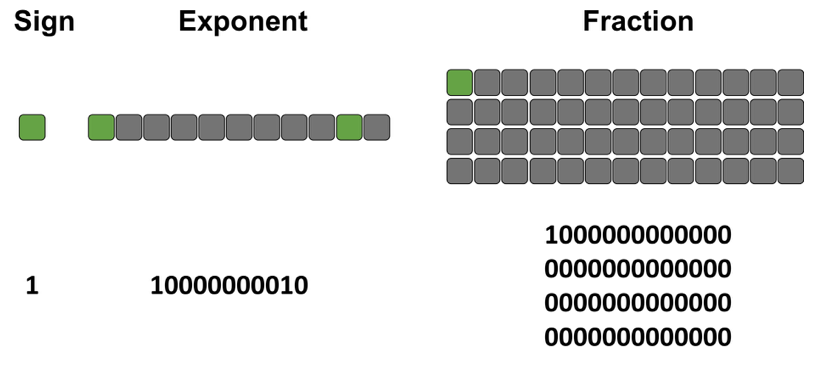

{cite:p}punto flotante results in [https://pythonnumericalmethods.berkeley.edu/notebooks/chapter09.02-Floating-Point-Numbers.html]

In [ ]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [ ]:
sys.float_info.max

1.7976931348623157e+308

In [ ]:
sys.float_info.min

2.2250738585072014e-308

# *Round-off Error*

La representación de números de punto flotante en los programas de cómputo tiene ciertas limitantes. Como ejemplo veamos la siguiente operación:

In [ ]:
4.9 - 4.845

0.055000000000000604

Nosotros hubieramos esperado que la diferencia de $4.9-4.845$ fuera igual a $0.55$. Sin embargo, no es así. Esto se debe a que las operaciones de punto flotante no se pueden representar con el número exacto, es solo una aproximación que causa un pequeño error.

{cite:p}`roundofferror` results in [https://pythonnumericalmethods.berkeley.edu/notebooks/chapter09.03-Roundoff-Errors.html]

# Accumulation of *round-off error*

Cuando estamos haciendo una secuencia de cálculos en una entrada inicial con error de redondeo debido a una representación inexacta, los errores pueden magnificarse o acumularse. 
En el siguiente ejemplo, tenemos el número 1 al que le sumamos y restamos 1/3, lo que nos da el mismo número 1. 

In [ ]:
1+1/3-1/3

1.0

Pero, ¿Y si sumamos y restamos muchas veces la misma cantidad (1/3)? ¿Obtendríamos oel mismo número 1? 
Se puede ver el ejemplo a continuación, 

In [ ]:
def add_and_subtract(iterations):
    result = 1
    
    for i in range(iterations):
        result += 1/3

    for i in range(iterations):
        result -= 1/3
    return result
add_and_subtract(100)

1.0000000000000002

Cuantas más veces haga esto, más errores se estarán acumulando.

In [ ]:
add_and_subtract(100000)

1.0000000000019214

# *Round-off error* in a typical calculation of a derivative. 

Se define el error absoluto como, la diferecia de la derivada menos el valor aproximado que obtuvimos:
\begin{equation}
\Delta h= \left|f'(x)-\frac{f(x+h)-f(x)}{h}\right|
%\label{eqerror} 
%\tag{1}
\end{equation}
Notamos que $\Delta h$ disminuye a medida que $h$ se hace pequeña, lo que es de esperarse. Sin embargo, por debajo de $h=10^{-8}$, el *round-off* error empieza a ser importante. Para valores más pequeños de $h(\leq10^{-16})$, el error es tan grande que la solución es totalmente inútil. 
Para probar la tolerancia de la ecuación al *round-off error*, definimos $\epsilon_t$ como el número más pequeño que podríamos sumar para obtener un número diferente de uno. 

In [ ]:
import sys
sys.float_info.epsilon

2.220446049250313e-16

# Probemos el round-off error en el caso del tiro parabólico

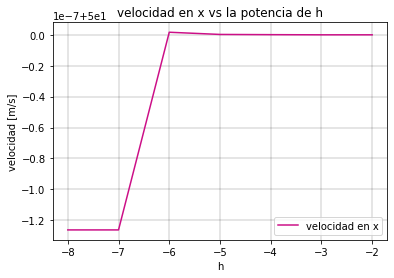

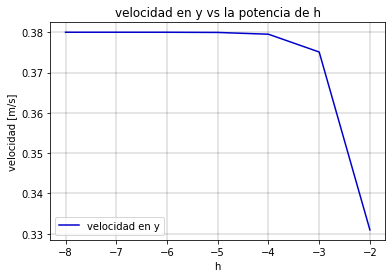

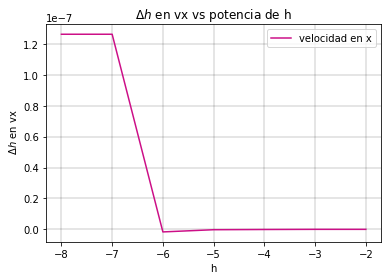

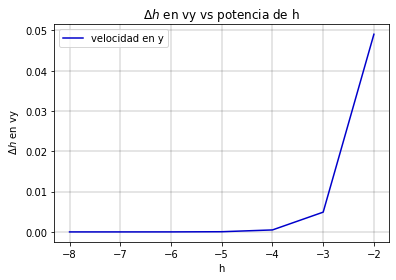

In [ ]:
#Programa para probar el round-off error del caso del tiro parabólico

import numpy as np
import matplotlib.pyplot as plt

#definiendo funciones
def x(t):
  return float(posicion_x)+float(velocidad_x)*t

def x1(h):
  return (x(t+(h))-x(t))/(h)  

def x1exacta():
  return float(velocidad_x)

def x2(h):
  return (x1(t+(h))-x1(t))/(h)
def x2exacta():
  return 0

def y(t):
  return float(posicion_y)+float(velocidad_y)*t-(1/2)*g*t**2
def y1(h):
  return (y(t+(h))-y(t))/(h)  

def y1exacta():
  return float(velocidad_y)-g*t

def y2(h):
  return (y1(t+(h))-y1(t))/(h)

def y2exacta():
  return -g


#inicializando variables
posicion_x=2 
posicion_y=5 
velocidad_x=50 
velocidad_y=20 
g=9.81
t=2 

vector_velocidadx=[]
vector_aceleracionx=[]
vector_velocidady=[]
vector_aceleraciony=[]
vector_velocidadxdeltah=[]
vector_aceleracionxdeltah=[]
vector_velocidadydeltah=[]
vector_aceleracionydeltah=[]


hexp=[]
hrange=np.arange(-8,-1,1)


#Operaciones

for hi in hrange:
  #hexp.append(10.0**hi)
  vx=x1(10.0**hi)
  vector_velocidadx.append(vx)
  vector_velocidadxdeltah.append(x1exacta()-vx)
  vy=y1(10.0**hi)
  vector_velocidady.append(vy)
  vector_velocidadydeltah.append(y1exacta()-vy)
  ax=x2(10.0**hi)
  vector_aceleracionx.append(ax)
  ay=y2(10.0**hi)
  vector_aceleraciony.append(ay)
 
plt.plot(hrange,vector_velocidadx,'#CC0F87', label="velocidad en x")
plt.grid(color="k", linestyle="-", linewidth=.2)
plt.title("velocidad en x vs la potencia de h")
plt.xlabel("h")
plt.ylabel("velocidad [m/s]")
plt.legend()
plt.show()
print("\n")
plt.plot(hrange,vector_velocidady,'#0000CC', label="velocidad en y")
plt.grid(color="k", linestyle="-", linewidth=.2)
plt.title("velocidad en y vs la potencia de h")
plt.xlabel("h")
plt.ylabel("velocidad [m/s]")
plt.legend()
plt.show()
print("\n")

plt.plot(hrange,vector_velocidadxdeltah,'#CC0F87', label="velocidad en x")
plt.grid(color="k", linestyle="-", linewidth=.2)
plt.title("$\Delta h $ en vx vs potencia de h")
plt.xlabel("h")
plt.ylabel(" $\Delta h$ en vx")
plt.legend()
plt.show()
print("\n")
plt.plot(hrange,vector_velocidadydeltah,'#0000CC', label="velocidad en y")
plt.grid(color="k", linestyle="-", linewidth=.2)
plt.title("$\Delta h $ en vy vs potencia de h")
plt.xlabel("h")
plt.ylabel(" $\Delta h$ en vy")
plt.legend()
plt.show()
print("\n")

# Como seleccionar h

Algunas referencias mencionan que las limitaciones normalmente se presentan alrededor de $h \sim 10^{-8}$. En general, el tamaño de $h$ debe deducirse en función de la escala del problema. Una buena aproximación es usar una escala de tiempo más baja que la escala que hace que el problema casi lineal.